# MobileNet Test 

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
if ".." not in sys.path:
    sys.path.append("..")  # Append pieye module root to sys.path

import torch
from torchvision import models
import torchvision.transforms as transforms
from PIL import Image

from pieye.labels import imagenet_labels

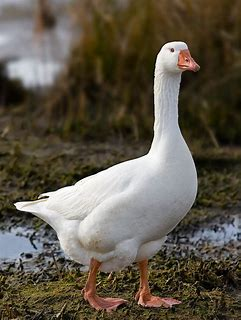

In [3]:
image = Image.open("test_image.jpg")
image

## Use model endpoint

In [4]:
import requests

res = requests.post(
    "http://localhost:5000/predict",
    files={"image": open("test_image.jpg", "rb")}
)
res.json()

{'label': 'goose', 'score': 0.8253995776176453}

## Local inference

In [10]:
# Load classification model.
model = models.quantization.mobilenet_v3_large(
    weights=models.quantization.MobileNet_V3_Large_QuantizedWeights.DEFAULT,
    quantize=True,
)
model = torch.jit.script(model)
model = model.eval()

preprocess= transforms.Compose([
    transforms.Resize((224, 224)),  # classification model's resolution
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [11]:
input_batch = preprocess(image).unsqueeze(0)
input_batch.shape

torch.Size([1, 3, 224, 224])

In [12]:
# deactivate autograd engine to not backprop
with torch.no_grad():
    outputs = model(input_batch)

In [25]:
values, indices = outputs.softmax(dim=1).max(1)
values, indices

(tensor([0.8254]), tensor([99]))

In [26]:
imagenet_labels[indices.item()]

'goose'